# Notebook to Make Plots for Paper

In [2]:
library(dplyr)
library(ggplot2)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [3]:
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

## Isoline Example

Demonstrate what an isoline is and the properties each point on the isoline shares.

In [4]:
isoline <- drawBivtIsoline(300, c(7,7), c(-2, -2), 0.01)

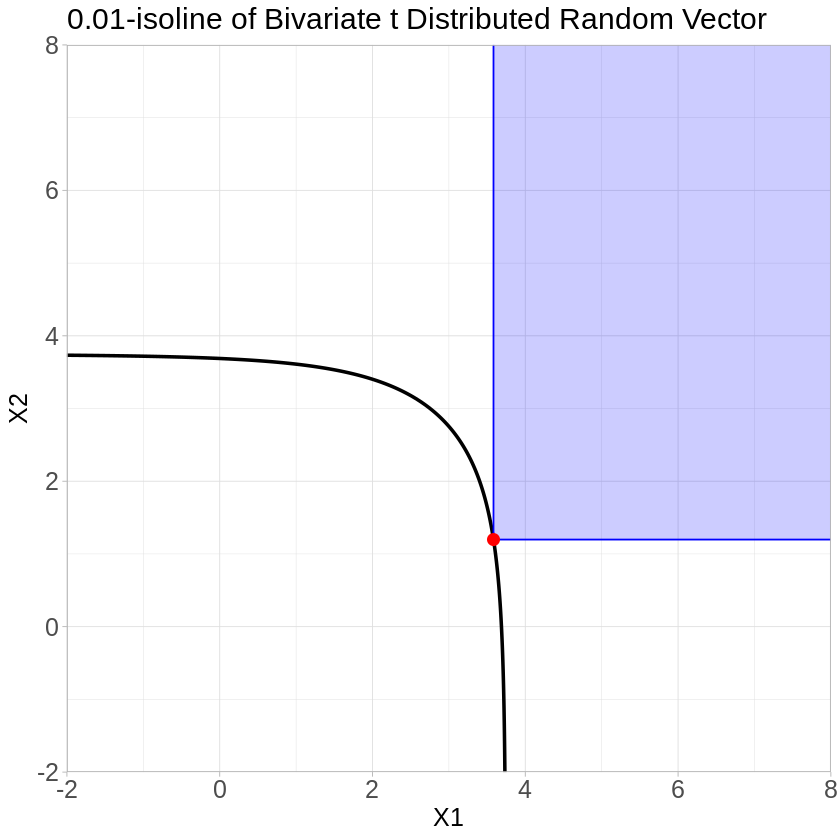

In [44]:
ggplot() + geom_line(data=isoline, aes(x=X1, y=X2), size=1) + 
geom_rect(aes(xmin=isoline[100,1], xmax=10, ymin=isoline[100,2], ymax=10), fill='blue', alpha=0.2, color='blue') + 
geom_point(data=rbind(isoline[100,]), aes(x=X1, y=X2), color='red', size=3) +
coord_cartesian(xlim = c(-2,8), ylim = c(-2,8), expand=FALSE) +
ggtitle('0.01-isoline of Bivariate t Distributed Random Vector') +
theme_light() +
theme(axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), text = element_text(size = 15))



## Confidence Region Example

In [73]:
names(ex_region)

[1] "beta0.5_p0.01_alpha0.01"            "beta0.5_p0.01_alpha0.05"           
 [3] "beta0.5_p0.01_alpha0.1"             "betasqrt(log(n)/n)_p0.01_alpha0.01"
 [5] "betasqrt(log(n)/n)_p0.01_alpha0.05" "betasqrt(log(n)/n)_p0.01_alpha0.1" 
 [7] "beta0.5_p0.05_alpha0.01"            "beta0.5_p0.05_alpha0.05"           
 [9] "beta0.5_p0.05_alpha0.1"             "betasqrt(log(n)/n)_p0.05_alpha0.01"
[11] "betasqrt(log(n)/n)_p0.05_alpha0.05" "betasqrt(log(n)/n)_p0.05_alpha0.1" 
[13] "beta0.5_p0.1_alpha0.01"             "beta0.5_p0.1_alpha0.05"            
[15] "beta0.5_p0.1_alpha0.1"              "betasqrt(log(n)/n)_p0.1_alpha0.01" 
[17] "betasqrt(log(n)/n)_p0.1_alpha0.05"  "betasqrt(log(n)/n)_p0.1_alpha0.1"

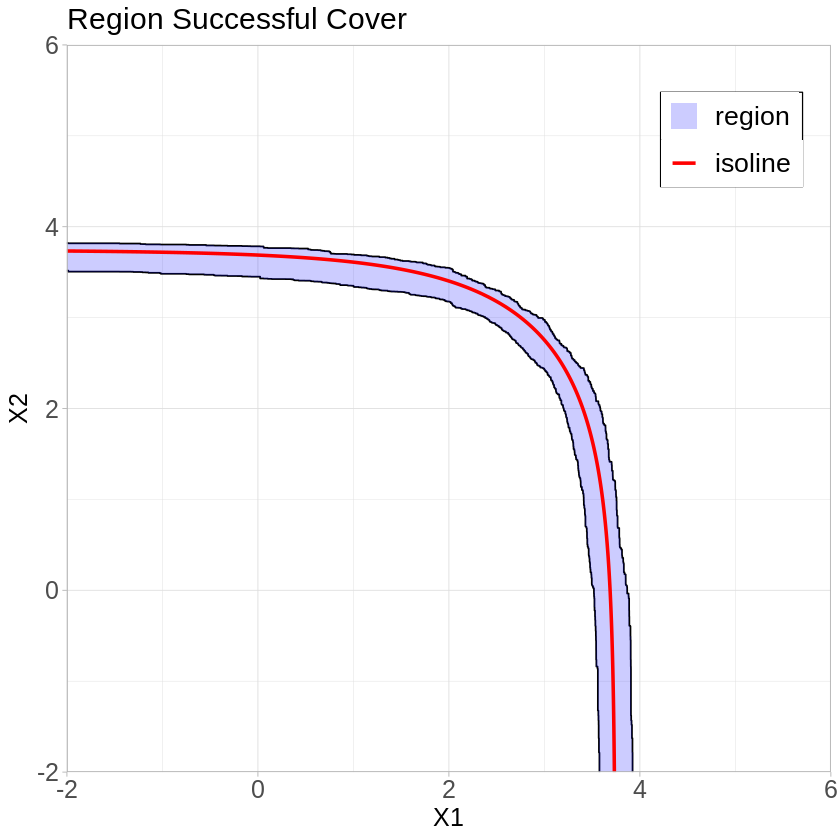

In [74]:
path <- '/pscratch/sd/j/jbbutler/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/50000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_1.RData'
ex_region <- readRDS(path)

polygon <- rbind(ex_region[[3]][[1]], 
                 data.frame(t(rev(data.frame(t(ex_region[[3]][[2]]))))))
n <- nrow(ex_region[[3]]$data)
p <- ex_region[[3]]$p
alpha <- ex_region[[3]]$alpha

ggplot() +
geom_line(data=ex_region[[3]][[1]], aes(x=X1, y=X2)) +
geom_line(data=ex_region[[3]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,6), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,6), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Region Successful Cover')) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

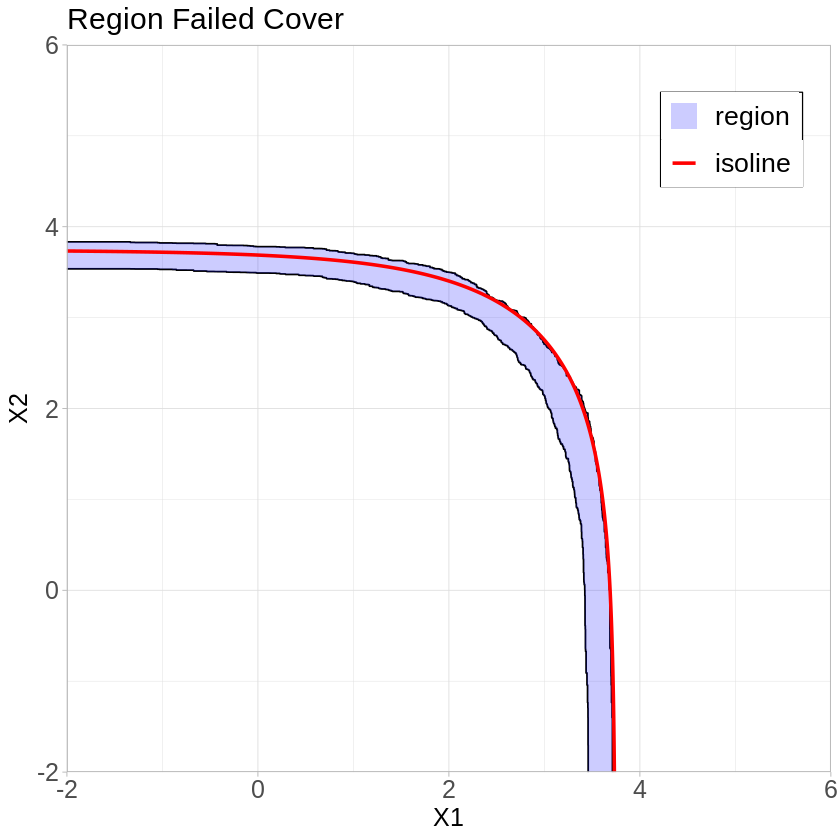

In [83]:
path <- '/pscratch/sd/j/jbbutler/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/50000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_46.RData'
ex_region <- readRDS(path)

polygon <- rbind(ex_region[[3]][[1]], 
                 data.frame(t(rev(data.frame(t(ex_region[[3]][[2]]))))))
n <- nrow(ex_region[[3]]$data)
p <- ex_region[[3]]$p
alpha <- ex_region[[3]]$alpha

ggplot() +
geom_line(data=ex_region[[3]][[1]], aes(x=X1, y=X2)) +
geom_line(data=ex_region[[3]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,6), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,6), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Region Failed Cover')) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [4]:
# loading the dataframe of results
bivt_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/isolinenumCoords_500.RData')
bivt_res <- readRDS(bivt_path)
bivt_res$n <- as.integer(bivt_res$n)

res <- bivt_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


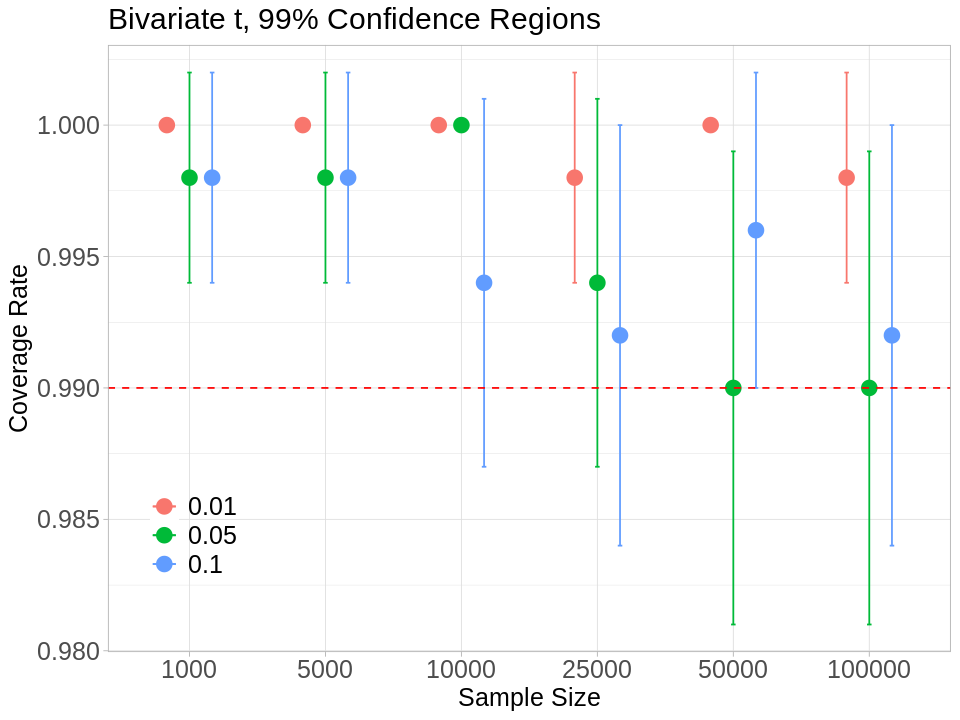

In [5]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


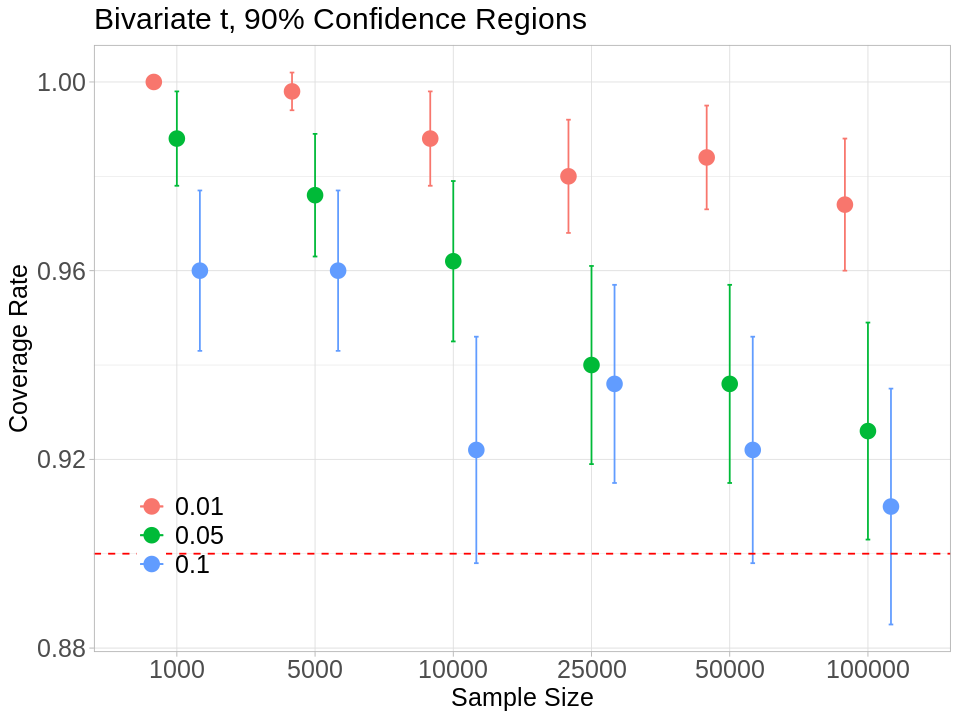

In [6]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


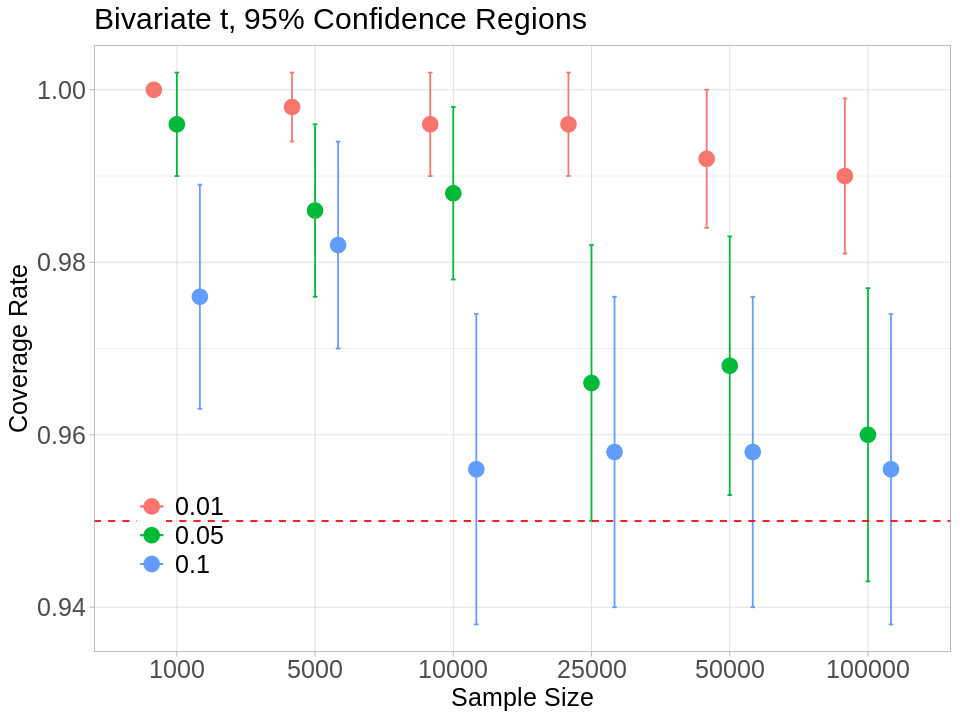

In [7]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05 
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))


In [8]:
# loading the dataframe of results
bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/isolinenumCoords_500.RData')
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivgauss_res$n)

res <- bivgauss_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


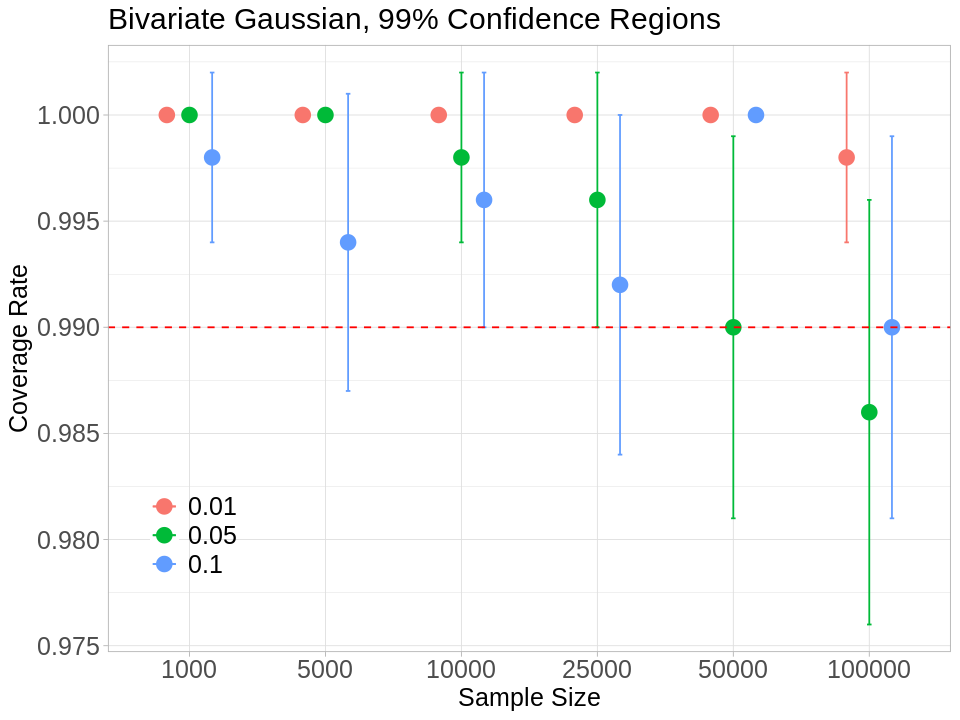

In [9]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


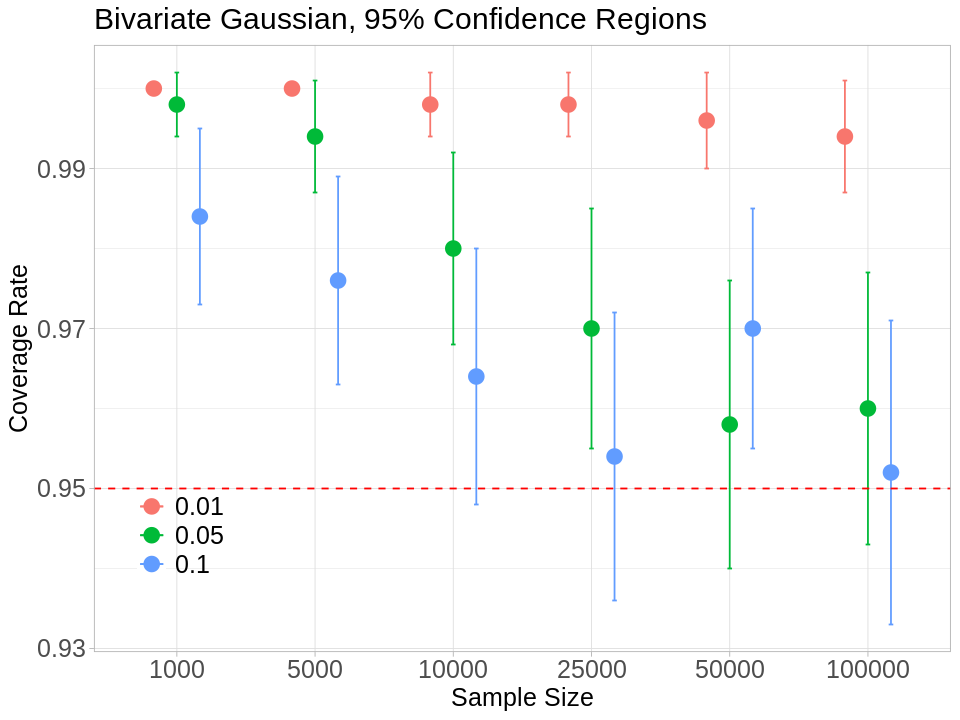

In [10]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


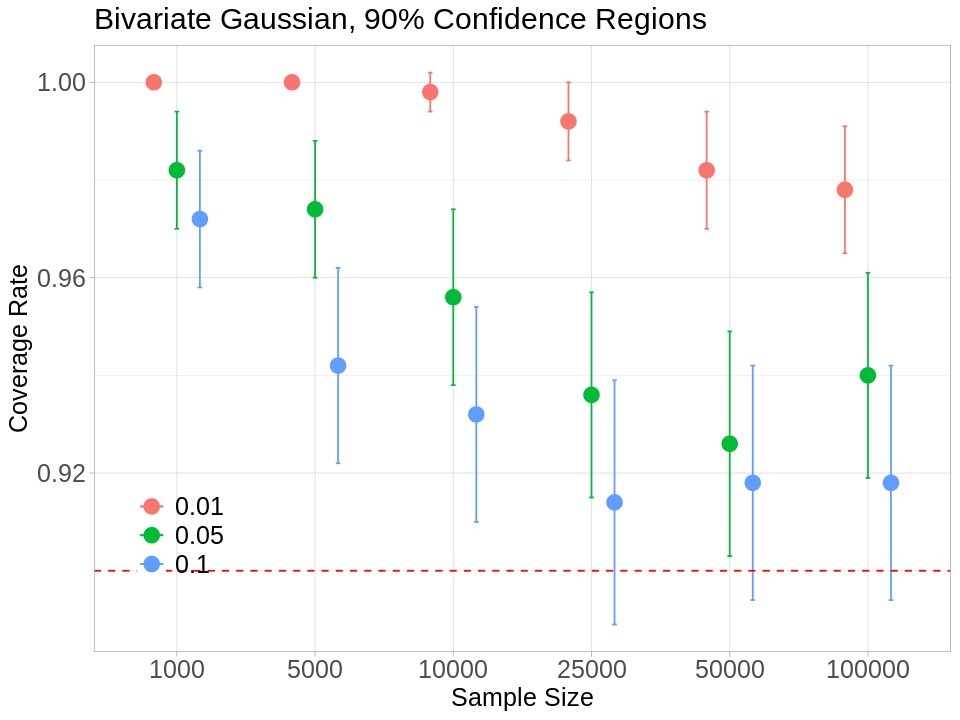

In [11]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [12]:
# loading the dataframe of results
bivkarachi_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/karachi/400x400_on_[50,140]x[0,100]/isolinenumCoords_500.RData')
bivkarachi_res <- readRDS(bivkarachi_path)
bivkarachi_res$n <- as.integer(bivkarachi_res$n)

res <- bivkarachi_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


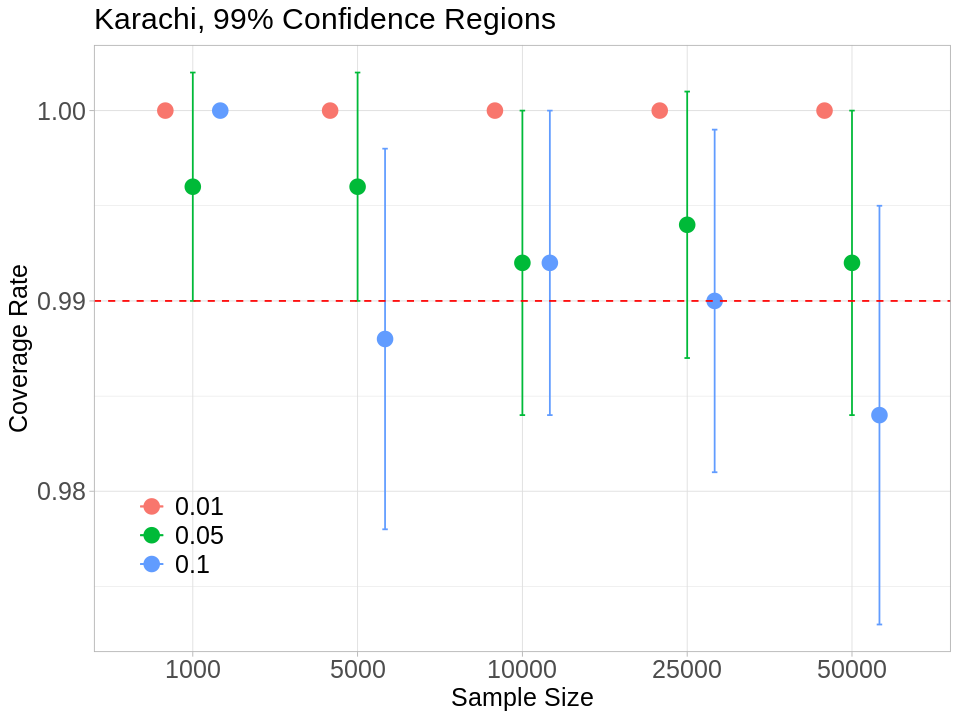

In [13]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


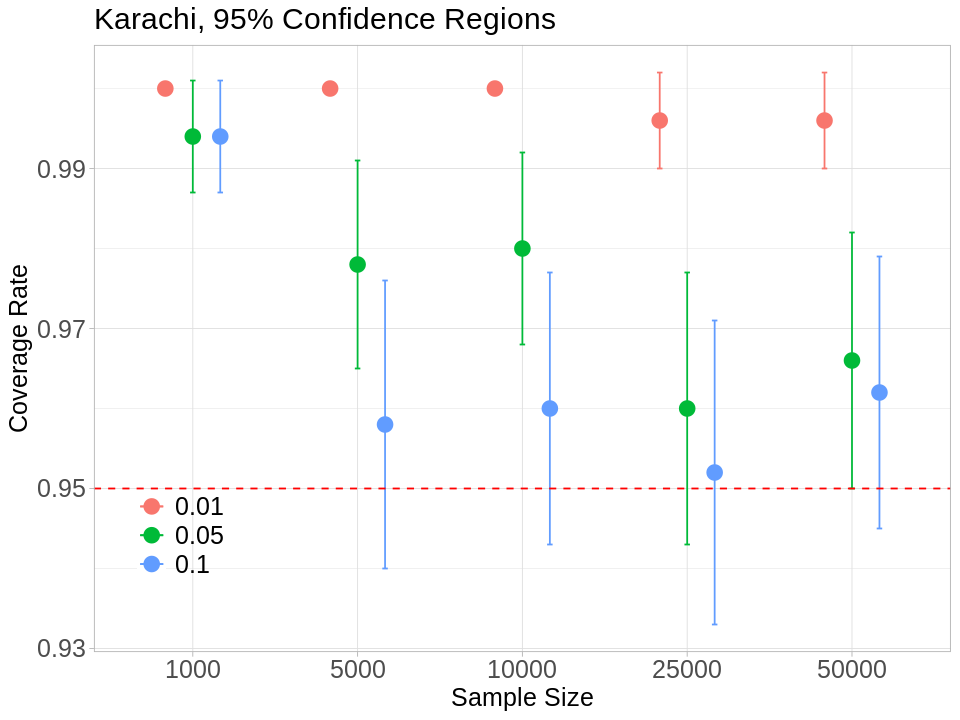

In [14]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


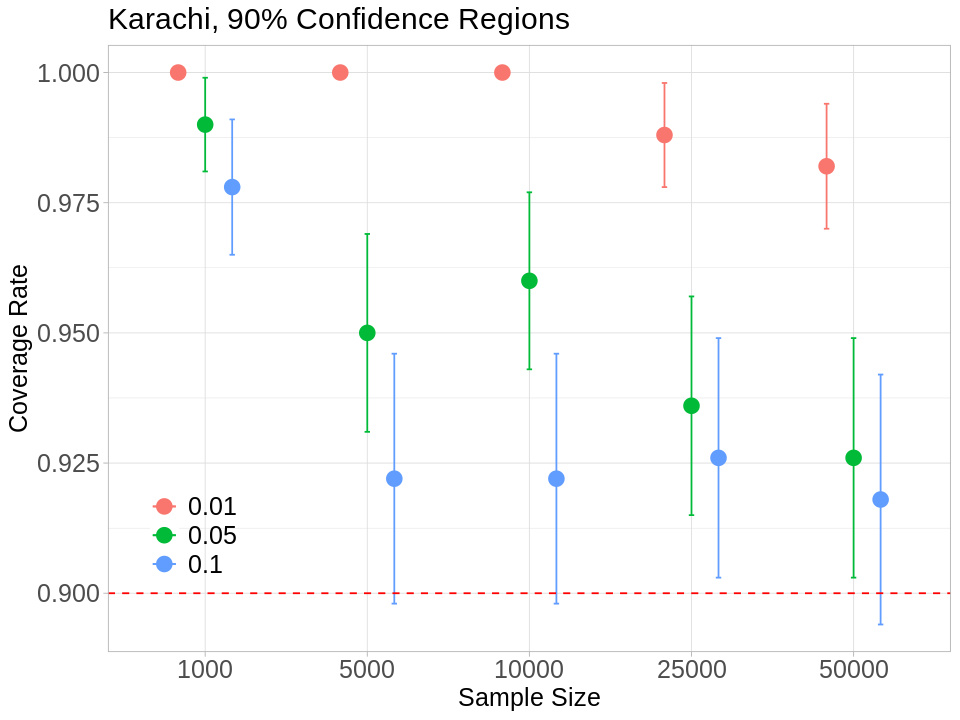

In [15]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))